In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [215]:
test=pd.read_csv("C:/Users/User/Downloads/titanic/test.csv")
train=pd.read_csv("C:/Users/User/Downloads/titanic/train.csv")

In [216]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [217]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [257]:
train.shape

(891, 21)

In [219]:
test.shape

(418, 11)

In [220]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [258]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_encode,Fare_fillin,fares
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,32.843148,0.702581
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,49.657185,0.784817
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,4.012500,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,7.925000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,14.500000,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,31.275000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,512.329200,2.000000



# data preprocessing

In [340]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
title            0
young&women      0
man              0
Embarked_C       0
Embarked_S       0
Embarked_Q       0
Sex_encode       0
Fare_fillin      1
FamilySize       0
FamilyType       0
Single           0
Nuclear          0
Big              0
fares           63
dtype: int64

In [223]:
def get_title(name):
    return name.split(', ')[1].split('.')[0]

train["title"]=train["Name"].apply(get_title)
test["title"]=test["Name"].apply(get_title)
print(train["title"].unique(),test["title"].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer'] ['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


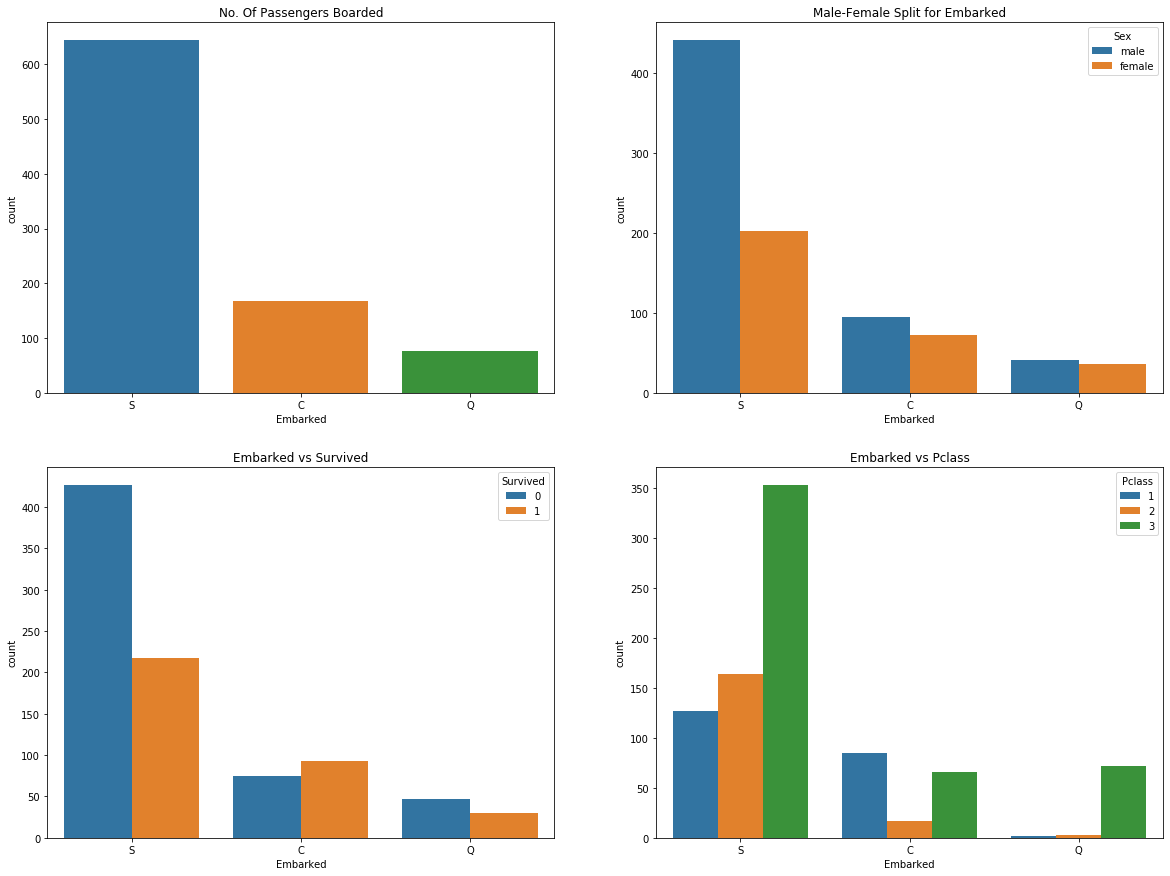

In [224]:
f, ax = plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data=train,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=train,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=train,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=train,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.show()

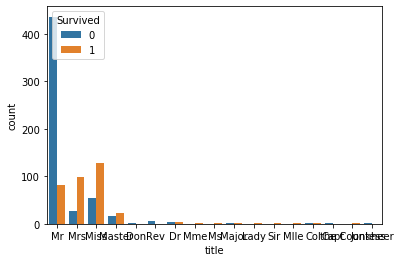

In [225]:
sns.countplot(x="title", hue="Survived",data=train)

- train으로 survived와 변수와의 상관관계를 밝히고 test로 넘어간다

In [226]:
train["young&women"]=(train["title"]=="Mrs") | (train["title"]=="Miss") | (train["title"]=="Master") | (train["title"]=="Ms")\
|(train["title"]=="Lady") | (train["title"]=="the Countess") |(train["title"]=="Mme") | (train["title"]=="Mlle") |(train["title"]=="Dr")

train["man"]=(train["title"]=="Mr")|(train["title"]=="Col")|(train["title"]=="Rev")|(train["title"]=="Don")

test["young&women"]=(test["title"]=="Mrs") | (test["title"]=="Miss") | (test["title"]=="Master")| (test["title"]=="Ms")\
|(test["title"]=="Dona")|(train["title"]=="Dr")
test["man"]= (test["title"]=="Mr")|(test["title"]=="Col")|(test["title"]=="Rev")

In [227]:
print(train.loc[886])

PassengerId                      887
Survived                           0
Pclass                             2
Name           Montvila, Rev. Juozas
Sex                             male
Age                               27
SibSp                              0
Parch                              0
Ticket                        211536
Fare                              13
Cabin                            NaN
Embarked                           S
title                            Rev
young&women                    False
man                             True
Name: 886, dtype: object


In [228]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
title            0
young&women      0
man              0
dtype: int64

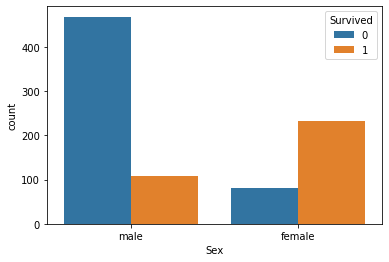

In [229]:
sns.countplot(data=train, x="Sex", hue="Survived")

In [230]:
pd.pivot_table(train, index="title", values="Survived")

,Survived
title,
Capt,0.000000
Col,0.500000
Don,0.000000
Dr,0.428571
Jonkheer,0.000000
Lady,1.000000
Major,0.500000
Master,0.575000
Miss,0.697802


- 여성승객이 남성승객보다 생존율이높다
- 성별은 생존률에 유의미한 변수이다

In [231]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
title          891 non-null object
young&women    891 non-null bool
man            891 non-null bool
dtypes: bool(2), float64(2), int64(5), object(6)
memory usage: 92.4+ KB



# EDA 탐색적 자료 분석

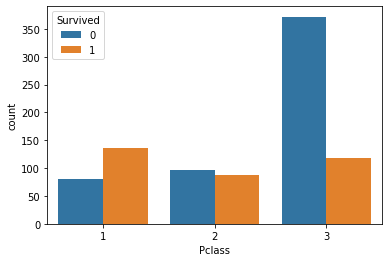

In [232]:
sns.countplot(data=train, x="Pclass", hue="Survived")

In [233]:
pd.pivot_table(train, index="Pclass", values="Survived")

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


- 3등객실에 비해 1등객실의 생존률이 높다
- 객실 등급은 생존률에 유의미한 변수이다

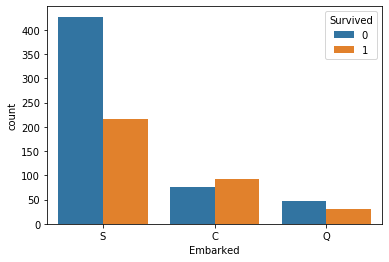

In [234]:
sns.countplot(data=train, x="Embarked", hue="Survived")

In [235]:
pd.pivot_table(train, index="Embarked", values="Survived")

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [262]:
train["Embarked"]=train["Embarked"].fillna("S")
train["Embarked_C"] = train["Embarked"] == "C"
train["Embarked_S"] = train["Embarked"] == "S"
train["Embarked_Q"] = train["Embarked"] == "Q"

In [263]:
train[["Embarked", "Embarked_C", "Embarked_S", "Embarked_Q"]].head()

,Embarked,Embarked_C,Embarked_S,Embarked_Q
0,S,False,True,False
1,C,True,False,False
2,S,False,True,False
3,S,False,True,False
4,S,False,True,False


In [264]:
train.shape

(891, 21)

In [240]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,young&women,man,Embarked_C,Embarked_S,Embarked_Q
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,False,True,False,True,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,True,False,False,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,True,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,False,True,False,True,False


In [265]:
test["Embarked_C"] = test["Embarked"] == "C"
test["Embarked_S"] = test["Embarked"] == "S"
test["Embarked_Q"] = test["Embarked"] == "Q"

In [266]:
test[["Embarked", "Embarked_C", "Embarked_S", "Embarked_Q"]].head()

,Embarked,Embarked_C,Embarked_S,Embarked_Q
0,Q,False,False,True
1,S,False,True,False
2,Q,False,False,True
3,S,False,True,False
4,S,False,True,False


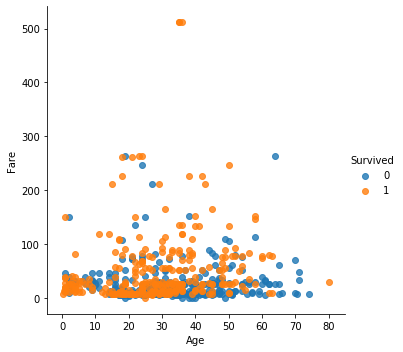

In [267]:
sns.lmplot(data=train, x="Age", y="Fare",hue="Survived", fit_reg=False)

In [244]:
low_fare = train[train["Fare"] < 500]
high_fare=train[train["Fare"]>=500]
high_fare

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,young&women,man,Embarked_C,Embarked_S,Embarked_Q
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Miss,True,False,True,False,False
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr,False,True,True,False,False
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Mr,False,True,True,False,False


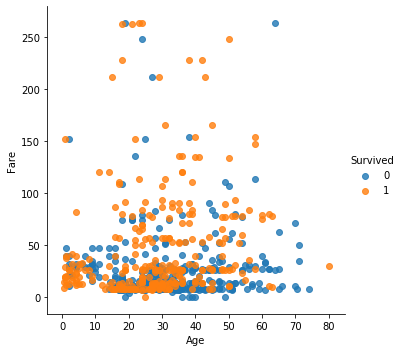

In [245]:
sns.lmplot(data=low_fare, x="Age", y="Fare", hue="Survived", fit_reg=False)

In [246]:
test.loc[test["Sex"] == "male", "Sex_encode"] = 1
test.loc[test["Sex"] == "female", "Sex_encode"] = 0

In [247]:
train.loc[train["Sex"] == "male", "Sex_encode"] =1
train.loc[train["Sex"] == "female", "Sex_encode"] = 0

In [248]:
train[["Sex", "Sex_encode"]].head()

,Sex,Sex_encode
0,male,1.0
1,female,0.0
2,female,0.0
3,female,0.0
4,male,1.0


In [249]:
test[["Sex", "Sex_encode"]].head()

,Sex,Sex_encode
0,male,1.0
1,female,0.0
2,male,1.0
3,male,1.0
4,female,0.0


In [325]:
train["Fare_fillin"] = train["Fare"]
test["Fare_fillin"] = test["Fare"]

In [501]:
third_fare_train=train.loc[train["Pclass"]==3, "Fare"]
third_fare_test=test.loc[test["Pclass"]==3, "Fare"]
print(third_fare_train.median(),third_fare_test.median())

8.05 7.8958


In [502]:
second_fare_train=train.loc[train["Pclass"]==2, "Fare"]
second_fare_test=test.loc[test["Pclass"]==2, "Fare"]
print(second_fare_train.median(),second_fare_test.median())

14.25 15.75


In [503]:
first_fare_train=train.loc[(train["Pclass"]==1) & (train["Fare"]<300), "Fare"]
first_fare_test=test.loc[(test["Pclass"]==1)&(test["Fare"]<300),  "Fare"]
print(first_fare_train.median(),first_fare_test.median())

57.9792 60.0


In [504]:
test.loc[((test["Fare"]==0.0 )| (test["Fare"].isnull()))& (test["Pclass"]==1), "Fare_fillin"] = first_fare_test.median()
train.loc[(train["Fare"]==0.0 )| (train["Pclass"]==1), "Fare_fillin"] = first_fare_train.median()

test.loc[((test["Fare"]==0.0) |(test["Fare"].isnull()))& (test["Pclass"]==2), "Fare_fillin"] = second_fare_test.median()
train.loc[(train["Fare"]==0.0)| (train["Pclass"]==2), "Fare_fillin"] = second_fare_train.median()

test.loc[((test["Fare"]==0.0) |(test["Fare"].isnull()))&( test["Pclass"]==3), "Fare_fillin"] = third_fare_test.median() 
train.loc[(train["Fare"]==0.0) | (train["Pclass"]==3), "Fare_fillin"] = third_fare_train.median()

In [343]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
title            0
young&women      0
man              0
Embarked_C       0
Embarked_S       0
Embarked_Q       0
Sex_encode       0
Fare_fillin      0
fares            0
FamilySize       0
FamilyType       0
Single           0
Nuclear          0
Big              0
dtype: int64

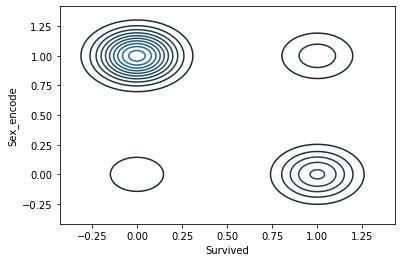

In [187]:
sns.kdeplot(train["Survived"], train["Sex_encode"])

In [509]:
train.loc[train["Fare_fillin"]<10, "fares"]=0
train.loc[(train["Fare_fillin"]>=10) & (train["Fare_fillin"]<=35), "fares"]=1
train.loc[(train["Fare_fillin"]>35), "fares"]=2

test.loc[test["Fare_fillin"]<10, "fares"]=0
test.loc[(test["Fare_fillin"]>=10) & (test["Fare_fillin"]<=35), "fares"]=1
test.loc[(test["Fare_fillin"]>35), "fares"]=2
pd.pivot_table(train, index="fares", values="Survived")

,Survived
fares,
0.0,0.237052
1.0,0.488764
2.0,0.644550


In [510]:
train.corr()#상관관계 매트릭스

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,young&women,man,Embarked_C,Embarked_S,Embarked_Q,Sex_encode,Fare_fillin,fares,FamilySize,Single,Nuclear,Big,mysex
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.049744,0.041419,-0.001205,0.022204,-0.033606,0.042939,0.023265,0.021634,-0.040143,0.057462,-0.028976,-0.057055,-0.041419
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.563511,-0.562671,0.168240,-0.149683,0.003650,-0.543351,0.319530,0.356638,0.016639,-0.203367,0.279855,-0.125147,0.562671
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.109791,0.127425,-0.243292,0.074053,0.221009,0.131900,-0.917824,-0.979271,0.065997,0.135207,-0.223551,0.152366,-0.127425
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.256904,0.235802,0.036261,-0.023233,-0.022405,0.093254,0.357485,0.363850,-0.301914,0.198270,-0.083059,-0.226521,-0.235802
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.260895,-0.259057,-0.059528,0.068734,-0.026354,-0.114631,-0.055891,-0.073128,0.890712,-0.584471,0.213225,0.730691,0.259057
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.345308,-0.341989,-0.011069,0.060814,-0.081228,-0.245489,-0.010963,-0.008291,0.783111,-0.583398,0.265863,0.631523,0.341989
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.187869,-0.188564,0.269335,-0.162184,-0.117216,-0.182333,0.608117,0.565329,0.217138,-0.271832,0.205527,0.143636,0.188564
young&women,-0.049744,0.563511,-0.109791,-0.256904,0.260895,0.345308,0.187869,1.000000,-0.988440,0.070876,-0.112746,0.080495,-0.895928,0.097330,0.127915,0.350823,-0.406498,0.297336,0.233257,0.988440
man,0.041419,-0.562671,0.127425,0.235802,-0.259057,-0.341989,-0.188564,-0.988440,1.000000,-0.071057,0.110586,-0.076811,0.885571,-0.111956,-0.140334,-0.347908,0.405681,-0.298450,-0.229632,-1.000000
Embarked_C,-0.001205,0.168240,-0.243292,0.036261,-0.059528,-0.011069,0.269335,0.070876,-0.071057,1.000000,-0.782742,-0.148258,-0.082853,0.299075,0.254504,-0.046215,-0.095298,0.158586,-0.109274,0.071057


In [280]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
print(train.shape)

(891, 26)


In [271]:
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1
print(test.shape)

(418, 20)


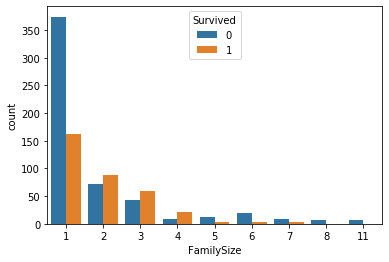

In [272]:
sns.countplot(data=train, x="FamilySize", hue="Survived")

In [273]:
train.loc[train["FamilySize"] == 1, "FamilyType"] = "Single"
train.loc[(train["FamilySize"] > 1) & (train["FamilySize"] < 5), "FamilyType"] = "Nuclear"
train.loc[train["FamilySize"] >= 5, "FamilyType"] = "Big"
print(train.shape)
train[["FamilySize", "FamilyType"]].head(10)

(891, 23)


,FamilySize,FamilyType
0,2,Nuclear
1,2,Nuclear
2,1,Single
3,2,Nuclear
4,1,Single
5,1,Single
6,1,Single
7,5,Big
8,3,Nuclear
9,2,Nuclear


In [274]:
test.loc[train["FamilySize"] == 1, "FamilyType"] = "Single"
test.loc[(train["FamilySize"] > 1) & (train["FamilySize"] < 5), "FamilyType"] = "Nuclear"
test.loc[train["FamilySize"] >= 5, "FamilyType"] = "Big"

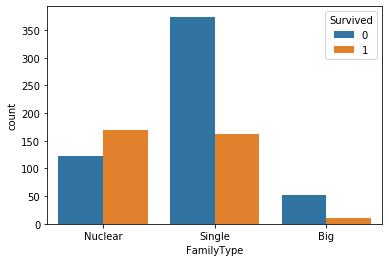

In [275]:
sns.countplot(data=train, x="FamilyType", hue="Survived")

In [276]:
pd.pivot_table(data=train, index="FamilyType", values="Survived")

,Survived
FamilyType,
Big,0.161290
Nuclear,0.578767
Single,0.303538


In [277]:
train["Single"] = train["FamilySize"] == 1
train["Nuclear"] = (train["FamilySize"] > 1) & (train["FamilySize"] < 5)
train["Big"] = train["FamilySize"] >= 5
print(train.shape)
train[["FamilySize", "Single", "Nuclear", "Big"]].head(10)

(891, 26)


,FamilySize,Single,Nuclear,Big
0,2,False,True,False
1,2,False,True,False
2,1,True,False,False
3,2,False,True,False
4,1,True,False,False
5,1,True,False,False
6,1,True,False,False
7,5,False,False,True
8,3,False,True,False
9,2,False,True,False


In [278]:
test["Single"] = test["FamilySize"] == 1
test["Nuclear"] = (test["FamilySize"] > 1) & (test["FamilySize"] < 5)
test["Big"] = test["FamilySize"] >= 5
print(test.shape)
test[["FamilySize", "Single", "Nuclear", "Big"]].head(10)

(418, 24)


,FamilySize,Single,Nuclear,Big
0,1,True,False,False
1,2,False,True,False
2,1,True,False,False
3,1,True,False,False
4,3,False,True,False
5,1,True,False,False
6,1,True,False,False
7,3,False,True,False
8,1,True,False,False
9,3,False,True,False


In [494]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,young&women,man,Embarked_C,Embarked_S,Embarked_Q,Sex_encode,Fare_fillin,fares,FamilySize,Single,Nuclear,Big,mysex
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.049744,0.041419,-0.001205,0.022204,-0.033606,0.042939,0.023267,0.021634,-0.040143,0.057462,-0.028976,-0.057055,0.041419
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.563511,-0.562671,0.168240,-0.149683,0.003650,-0.543351,0.317052,0.356638,0.016639,-0.203367,0.279855,-0.125147,-0.562671
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.109791,0.127425,-0.243292,0.074053,0.221009,0.131900,-0.912606,-0.979271,0.065997,0.135207,-0.223551,0.152366,0.127425
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.256904,0.235802,0.036261,-0.023233,-0.022405,0.093254,0.356091,0.363850,-0.301914,0.198270,-0.083059,-0.226521,0.235802
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.260895,-0.259057,-0.059528,0.068734,-0.026354,-0.114631,-0.055006,-0.073128,0.890712,-0.584471,0.213225,0.730691,-0.259057
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.345308,-0.341989,-0.011069,0.060814,-0.081228,-0.245489,-0.011044,-0.008291,0.783111,-0.583398,0.265863,0.631523,-0.341989
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.187869,-0.188564,0.269335,-0.162184,-0.117216,-0.182333,0.608175,0.565329,0.217138,-0.271832,0.205527,0.143636,-0.188564
young&women,-0.049744,0.563511,-0.109791,-0.256904,0.260895,0.345308,0.187869,1.000000,-0.988440,0.070876,-0.112746,0.080495,-0.895928,0.095763,0.127915,0.350823,-0.406498,0.297336,0.233257,-0.988440
man,0.041419,-0.562671,0.127425,0.235802,-0.259057,-0.341989,-0.188564,-0.988440,1.000000,-0.071057,0.110586,-0.076811,0.885571,-0.110441,-0.140334,-0.347908,0.405681,-0.298450,-0.229632,1.000000
Embarked_C,-0.001205,0.168240,-0.243292,0.036261,-0.059528,-0.011069,0.269335,0.070876,-0.071057,1.000000,-0.782742,-0.148258,-0.082853,0.300093,0.254504,-0.046215,-0.095298,0.158586,-0.109274,-0.071057


In [ ]:
#mysex로 young&women일때 1, man일때 0을 대입했는데 점수가 더 낮게나옴


# Fitting the model

In [511]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [540]:
features = ["Pclass", "man","young&women", "fares",
                 "Single","Nuclear"]

In [513]:
features

['Pclass', 'man', 'young&women', 'fares', 'Single', 'Nuclear']

In [514]:
label="Survived"
label

'Survived'

In [515]:
x_train = train[features]

In [516]:
x_train.head()

,Pclass,man,young&women,fares,Single,Nuclear
0,3,True,False,0.0,False,True
1,1,False,True,2.0,False,True
2,3,False,True,0.0,True,False
3,1,False,True,2.0,False,True
4,3,True,False,0.0,True,False


In [517]:
x_train.shape

(891, 6)

In [518]:
x_test=test[features]
x_test.head()

,Pclass,man,young&women,fares,Single,Nuclear
0,3,True,False,0.0,True,False
1,3,False,True,0.0,False,True
2,2,True,False,0.0,True,False
3,3,True,False,0.0,True,False
4,3,False,True,1.0,False,True


In [539]:
x_test.isnull().sum()

Pclass         0
man            0
young&women    0
fares          0
Single         0
Nuclear        0
dtype: int64

In [520]:
x_test.shape

(418, 6)

In [521]:
y_train=train[label]
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [522]:
from sklearn.tree import DecisionTreeClassifier

In [523]:
model = DecisionTreeClassifier(max_depth=5)

In [524]:
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [525]:
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [526]:
predictions = model.predict(x_test)

In [527]:
predictions.shape

(418,)

In [528]:
predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [529]:
submission = pd.read_csv("C:/Users/User/Downloads/titanic/gender_submission.csv", index_col="PassengerId")

In [530]:
submission.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [531]:
submission.shape

(418, 1)

In [532]:
submission["Survived"] = predictions

In [533]:
y_train=predictions

In [534]:
print(metrics.accuracy_score(predictions, y_train))

1.0


In [535]:
submission.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [536]:
submission.to_csv("C:/Users/User/Downloads/titanic/finish.csv")

In [499]:
import pandas_profiling
submission.profile_report()

In [538]:
train.profile_report()